Unsupervised Learning and Preprocessing
---------

Unsupervised Learning?
- 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝

### 3.1 Types of unsupervised learning

#### unsupervised transformation
- 비지도 변환
- 데이터를 새롭게 표현하거나 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소이다.
  - dimensionality reduction
- 많은 텍스트 문서에서 주제를 추출하는 것이 예시

#### clustering
- 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2 Challenges in unsupervised learning

비지도 학습에서 가장 어려운 건 알고리즘이 뭔가 유용한 것을 학습했는지 **평가**하는 것
- 레이블이 없는 데이터에 적용해야 하기 때문, 무엇이 올바른 출력인가?
- 별다른 방법 없이 직접 확인하는 것이 유일한 방법일 때가 많다.

그래서 비지도 학습의 경우 데이터를 더 잘 이해하고 싶을 때 EDA 단계에서 많이 사용
- 지도 학습의 전처리 단계에서도 사용, 비지도 학습의 결과로 새롭게 표현된 데이터를 사용하면 지도 학습의 정확도가 좋아지기도 함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 3.3 데이터 전처리와 스케일 조정

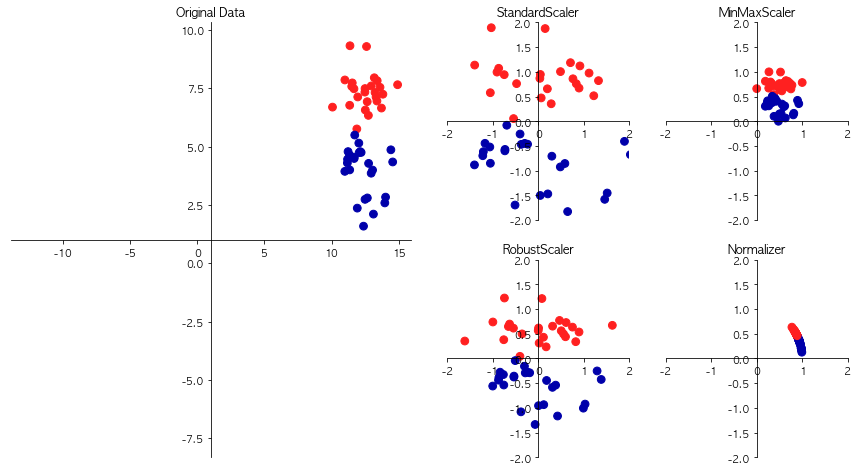

In [3]:
mglearn.plots.plot_scaling()

#### 3.3.1 여러 가지 전처리 방법


**StandardScaler**
- 각 feature의 평균을 0, 분산을 1로 변경하여 모든 feature가 같은 크기를 가지게 함
- z score를 생각하자, 표준점수!!
- feature의 최솟값과 최댓값 크기를 제한하지는 않음

**RobustScaler**
- feature들이 같은 scale을 갖게 된다는 통계적 측면에서 StandardScaler와 비슷
- 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용
- 이런 방식 덕분에 전체 데이터와 아주 동떨어진 값에 영향을 받지 않음(outlier에 영향을 받지 않음)

**MinMaxScaler**
- 모든 feature가 정확하게 0과 1 사이에 위치하도록 데이터를 변경
- 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y 축의 0과 1 사이의 사각 영역에 담기게 됨

**Normalizer**
- 매우 다른 스케일링 방법
- 특성 벡터의 유클리디안 길이가 1이 되도록 데이터를 조정
- 바꿔 말하면 지름이 1인 원(3차원의 경우 구)에 각 데이터 포인트를 투영
  - 데이터 포인트가 다른 비율로 스케일이 조정
  - 데이터의 방향 또는 각도가 중요할 때 많이 사용

#### 3.3.2 데이터 변환 적용하기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# 데이터 변환
# sklearn의 transform은 새로운 데이터를 표현(representation)을 만들 때 사용하는 방법

X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 데이터셋의 속성을 출력합니다

print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 3.3.3 QuantileTransformer & PowerTransformer

**QuantileTransformer**
- 1000개의 quantile를 사용하여 데이터를 균등하게 분포
- 이상치에 민감하지 않으며, 전체 데이터를 0과 1사이로 압축

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

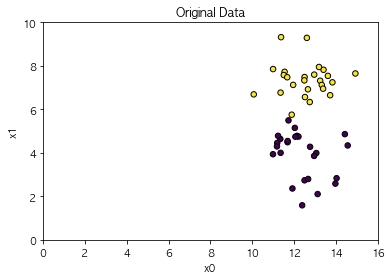

In [10]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

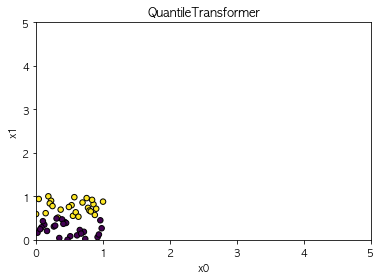

In [11]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

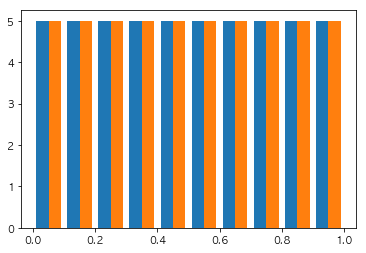

In [12]:
plt.hist(X_trans)
plt.show()

In [13]:
# n_quantiles parameter의 default 값은 1000

print(scaler.quantiles_.shape)

(1000, 2)


**example code**

In [14]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]
[9.99999998e-08 2.50083417e-01 5.00250250e-01 7.50000000e-01
 9.99999900e-01]


QuantileTransformer는 output_distribution parameter에서 normal로 지정하여 균등 분포가 아니라, 정규분포로 출력을 바꿀 수 있다.

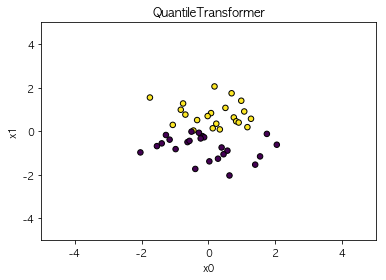

In [15]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

**PowerTransformer**

데이터의 feature 별로 정규분포 형태에 가깝게 변환해주는 역할
- default : yeo-johnson
- box-cox도 가능

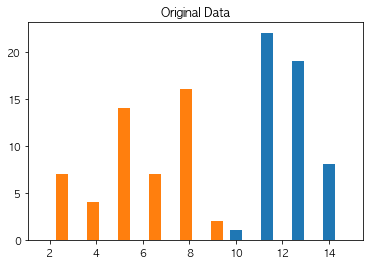

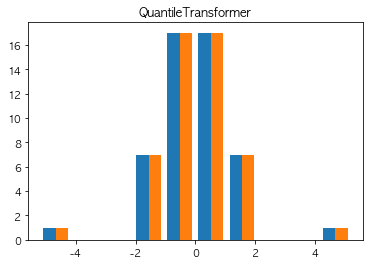

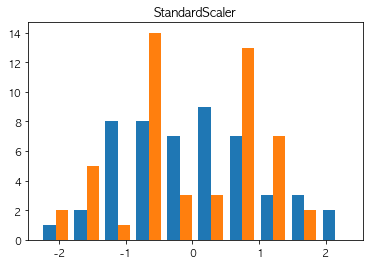

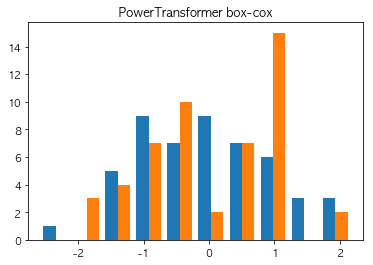

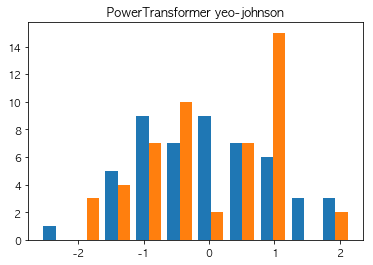

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()